In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import warnings
warnings.filterwarnings('ignore')

In [28]:
# Define paths to the training and validation directories
train_dir = 'data_new'
validation_dir = 'data_new'

In [3]:
# Data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

Found 2160 images belonging to 36 classes.
Found 2160 images belonging to 36 classes.


In [5]:
# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=200,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=100
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 112s 544ms/step - accuracy: 0.0490 - loss: 4.3269 - val_accuracy: 0.1025 - val_loss: 3.3316
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 87s 427ms/step - accuracy: 0.1453 - loss: 3.2169 - val_accuracy: 0.2188 - val_loss: 2.8838
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 101s 493ms/step - accuracy: 0.2744 - loss: 2.7335 - val_accuracy: 0.3620 - val_loss: 2.3941
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 83s 406ms/step - accuracy: 0.3795 - loss: 2.3557 - val_accuracy: 0.5312 - val_loss: 1.9763
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 101s 496ms/step - accuracy: 0.4934 - loss: 1.9061 - val_accuracy: 0.6300 - val_loss: 1.4014
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 83s 405ms/step - accuracy: 0.5796 - loss: 1.5728 - val_accuracy: 0.8000 - val_loss: 0.8794
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 101s 496ms/step - accuracy: 0.6517 - loss: 1.3192 - val_accuracy: 0.7605 - val_loss: 0.8889
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 83s 404ms/step - accuracy: 0.7205 - los

In [7]:
# Save the model
model.save('animal_detector.h5')

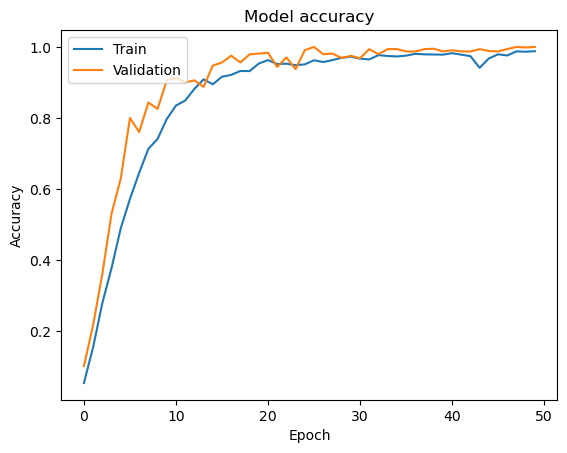

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming this is part of your training script

# Image data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    'data_new',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Your model training code here

# Save the class indices
class_indices = train_generator.class_indices
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)

Found 2160 images belonging to 36 classes.


In [36]:
# Load the trained model
model = load_model('Animal Detection/animal_detector.h5')

# Path to the uploaded image
uploaded_image_path = 'Animal Detection/Cow.jpeg'

In [38]:
# Preprocess the image
img = load_img(uploaded_image_path, target_size=(150, 150))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [40]:
# Predict the class
predictions = model.predict(img_array)
class_idx = np.argmax(predictions[0])
class_name = list(train_generator.class_indices.keys())[class_idx]

print(f'The image is detected as: {class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
The image is detected as: cow


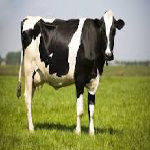

In [42]:
img